In [1]:
%matplotlib inline

import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
datas = 'pivot_table.xlsx'

In [16]:
df = pd.read_excel(datas)

In [17]:
# lets find the columns containing dob and gender
for col in df.columns:
    col = str(col)
    if 'birth' in col.lower() or 'gender' in col.lower():
        print(col)

Other than a few days at birth, I have been hospitalized...
Head circumference at birth was...
Next, birth length...
Next, birth weight...
Birth length was approximately...
Birth weight was approximately...
My date of birth is
My gender (self-identified) is...


In [19]:
# we're interested in the age, so let's calculate the age with a function
def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = pd.to_datetime(df['My date of birth is']).apply(calculate_age)

In [28]:
# numerical analysis of age
df['age'].describe()

count    226.000000
mean      18.340708
std       16.148033
min        0.000000
25%        5.000000
50%       12.000000
75%       30.000000
max       76.000000
Name: age, dtype: float64

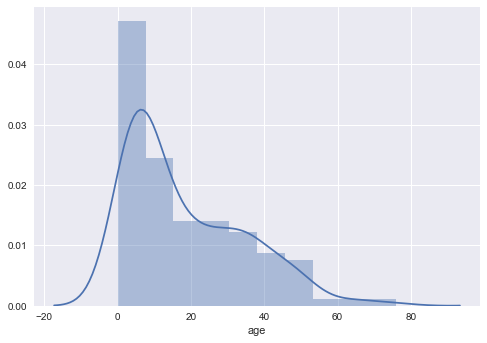

In [22]:
# now let's look at what the distribution of ages looks like
sns.distplot(df['age'].dropna())

In [29]:
# let's comapre numerically the ages of males and females
df.groupby('My gender (self-identified) is...')['age'].agg(['count', 'mean', 'std'])

,count,mean,std
My gender (self-identified) is...,,,
Female,89,18.269663,17.469951
Male,85,13.635294,10.961890
skipped,3,36.333333,32.020827


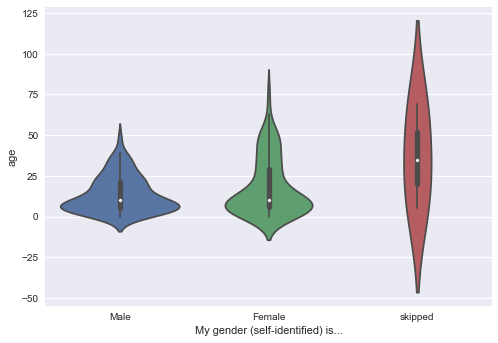

In [30]:
# now let's look at the distribution of ages of men and women
sns.violinplot(x='My gender (self-identified) is...', y='age', data=df)